In [20]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your Parquet file
parquet_file = '../results/we_love_dev-cleaned_data.parquet'

# Load Parquet file into a DataFrame
df = pd.read_parquet(parquet_file)
# Check if the DataFrame is empty
if df.empty:
    print("The Parquet file is empty.")
else:
    print("The Parquet file is not empty.")
    # Basic DataFrame exploration
    print(df.head(5))
    print(df.info())
    print(df.describe())


The Parquet file is not empty.
           company_name                             job_offer_title  \
0           KHI PORTAGE                               Data Engineer   
1      Groupe Creative                        Data Engineer (H/F/X)   
2  Full Data Management                               Data Engineer   
3           KHI PORTAGE                        DATA Analyst ( H/F)    
4             Capgemini  Développeuse.eur TechLead data - LILLE F/H   

              profession_title  \
0                Data engineer   
1                Data engineer   
2                Data engineer   
3                 Data Analyst   
4  Développeur.euse Full stack   

                                         description  salary_max  salary_avg  \
0  Quelle sera l étendu de vos extraordinaires mi...        55.0        45.0   
1  Envie d’un challenge sur la région lilloise ? ...        50.0        45.0   
2  **Descriptif du poste**\n\nDescriptif du poste...        50.0        40.0   
3  Quels seront l

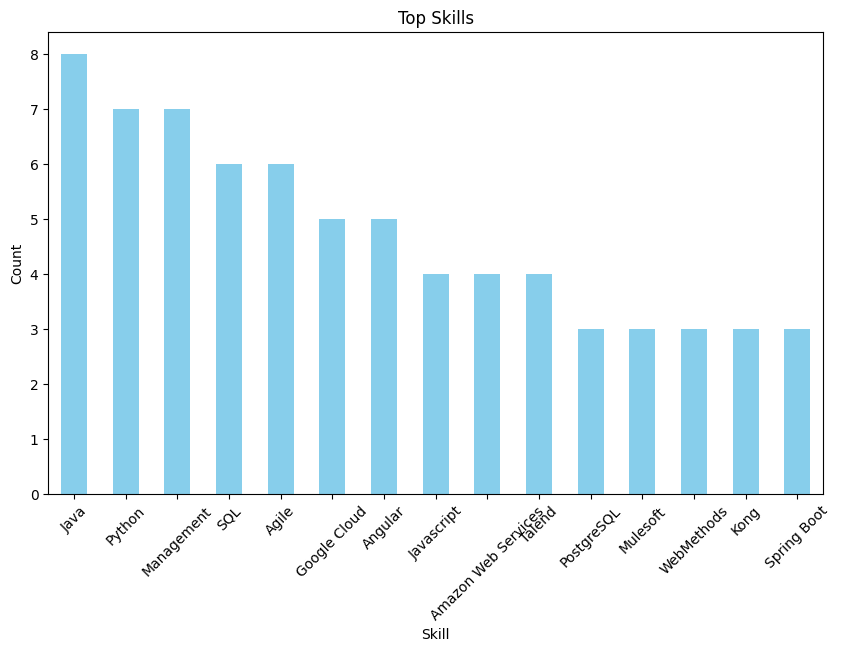

In [16]:
# Assuming you have a DataFrame df with skills data
# Split the skills column by '/' and stack the results into a Series
skills_series = df['skills'].str.split('/').apply(pd.Series).stack()

# Count the occurrences of each skill
skill_counts = skills_series.value_counts()

# Plot the top N skills
top_n = 15
top_skills = skill_counts.head(top_n)
top_skills.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

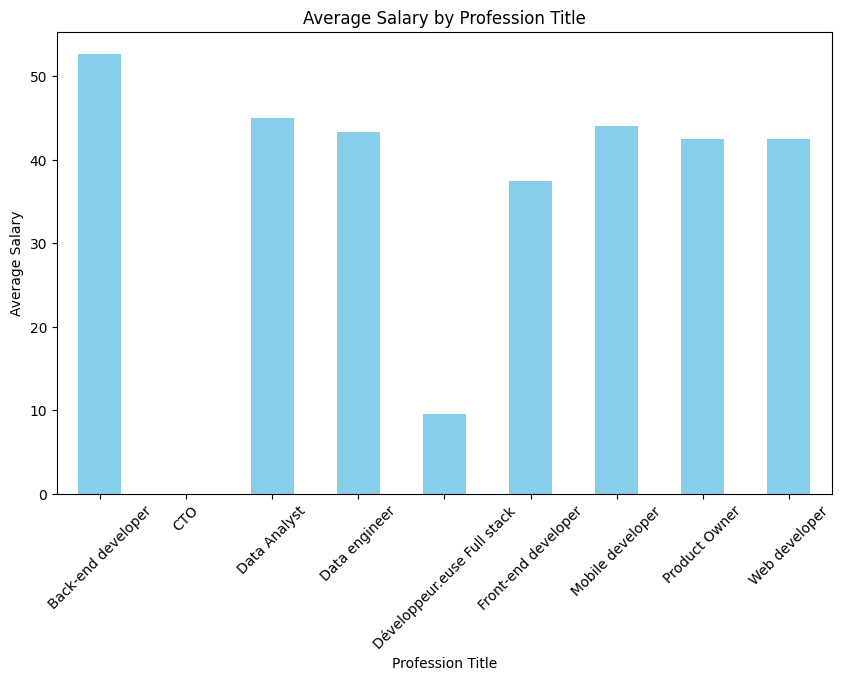

In [14]:
# Group by profession_title and calculate the average salary
avg_salary_by_profession = df.groupby('profession_title')['salary_avg'].mean()

# Plot the average salary for each profession_title
avg_salary_by_profession.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Salary by Profession Title')
plt.xlabel('Profession Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()